In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from collections import Counter
import pickle
from sklearn.metrics import pairwise_distances

/Users/bondarchukgleb/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from full_contract_clf import predict_for_full_contract
from single_sample_clf import predict_for_single_sample

In [3]:
X_train = pd.read_csv("data_final/train_X.csv")
y_train = pd.read_csv("data_final/train_y.csv")

train = X_train.merge(y_train, on=["contract_id", "report_date"], how="left")
test = pd.read_csv("data_final/test2_X.csv")

In [4]:
feature_names = pd.read_csv("utils/features_named.csv", index_col=0)
declensions = pd.read_csv("utils/name_reformer.csv", index_col=0)

In [5]:
def int_to_declesion(n):
    n = abs(n) % 100
    n1 = n % 10

    if 11 <= n <= 19:
            return {"недел": "недель", "месяц": "месяцев"}  # родительный падеж, множественное число
    if 2 <= n1 <= 4:
        return {"недел": "недели", "месяц": "месяца"}  # родительный падеж, единственное число
    if n1 == 1:
        return {"недел": "недели", "месяц": "месяца"}
    return {"недел": "недель", "месяц": "месяцев"}

In [6]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [7]:
def fill_f(feature, n, f_type):
    if f_type == "per_week":
        feature = feature.replace("недел{m}", int_to_declesion(n)["недел"]).replace("{n}", "последние " + str(n))
    elif f_type == "per_month":
        feature = feature.replace("месяц", int_to_declesion(n)["месяц"]).replace("{n}", str(n) + f" {int_to_declesion(n)['недел']} этого месяца")
    return feature

In [8]:
single_sample_preds = predict_for_single_sample(train)

100%|█████████████████████████████████████| 3448/3448 [00:01<00:00, 2921.45it/s]


In [9]:
corr = single_sample_preds.drop(["contract_id", "report_date", "sample_num"], axis=1).corr()

In [10]:
objective_features = corr["predicts"].iloc[1:][corr["predicts"].iloc[1:] > 0.1]

In [11]:
selected_features = []

for cont_id in single_sample_preds["contract_id"].unique():
    tmp = single_sample_preds[single_sample_preds["contract_id"] == cont_id]
    feature_shaps = tmp[list(objective_features.keys())]
    
    for i in range(len(tmp)):
        sample = tmp.iloc[i]
        sample_shaps = feature_shaps.iloc[-1]
        target_features = np.argpartition(sample_shaps, -3)[-3:]

        features = np.array(list(dict(sample_shaps).items()))[target_features]
        features = [[x[0], float(x[1])] for x in features if float(x[1]) > 0.1]
        selected_features.append([x[0] for x in features])

In [12]:
single_sample_preds["target_features"] = selected_features

In [13]:
tmp = pickle.load(open("tmp.pickle", "rb"))

In [14]:
tmp[0]["index"] = tmp[0]["contract_id"].map(lambda x: x.split("_")[1])
tmp[0]["contract_id"] = tmp[0]["contract_id"].map(lambda x: x.split("_")[0])

In [15]:
contract_slices = pd.concat([tmp[1], tmp[0][["predicts", "index", "contract_id"]]], axis=1)
contract_slices["contract_id"] = contract_slices["contract_id"].astype(int)
contract_slices["index"] = contract_slices["index"].astype(int)

In [16]:
contract_slices_high = contract_slices[contract_slices["predicts"] > 0.65]

In [17]:
contractors_confidence = pd.read_csv("utils/contractor_indexes_fixed.csv")

In [18]:
spec_data_index = pickle.load(open("utils/spec_data_fixed.pickle", "rb"))

In [19]:
single_sample_preds_test = predict_for_single_sample(test)

100%|█████████████████████████████████████| 2281/2281 [00:00<00:00, 3009.55it/s]


In [21]:
selected_features = []

for cont_id in single_sample_preds_test["contract_id"].unique():
    tmp = single_sample_preds_test[single_sample_preds_test["contract_id"] == cont_id]
    feature_shaps = tmp[list(objective_features.keys())]
    
    for i in range(len(tmp)):
        sample = tmp.iloc[i]
        sample_shaps = feature_shaps.iloc[-1]
        target_features = np.argpartition(sample_shaps, -3)[-3:]

        features = np.array(list(dict(sample_shaps).items()))[target_features]
        features = [[x[0], float(x[1])] for x in features if float(x[1]) > 0.1]
        selected_features.append([x[0] for x in features])

In [22]:
single_sample_preds_test["target_features"] = selected_features

In [55]:
contracts = []
idxes = []
for cont_id in test["contract_id"].unique():
    sl = test[test["contract_id"] == cont_id]
    for i in range(len(sl)):
        sl1 = sl.iloc[:i+1]
        sl1["contract_id"] = sl1["contract_id"].map(str) + f"_{i}"
        idxes.append(i)
        contracts.append(sl1)

In [56]:
contracts = pd.concat(contracts, axis=0)

In [57]:
tmp = predict_for_full_contract(contracts)

Feature Extraction:   0%|                                | 0/40 [00:00<?, ?it/s]/Users/bondarchukgleb/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/bondarchukgleb/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/bondarchukgleb/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/bondarchukgleb/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [58]:
tmp[0]["index"] = tmp[0]["contract_id"].map(lambda x: x.split("_")[1])
tmp[0]["contract_id"] = tmp[0]["contract_id"].map(lambda x: x.split("_")[0])

In [62]:
contract_slices_test = pd.concat([tmp[1], tmp[0][["predicts", "index", "contract_id"]]], axis=1)
contract_slices_test["contract_id"] = contract_slices_test["contract_id"].astype(int)
contract_slices_test["index"] = contract_slices_test["index"].astype(int)

In [63]:
contract_slices_test_high = contract_slices_test[contract_slices_test["predicts"] > 0.65]

In [65]:
contract_slices_high = pd.concat([contract_slices_test_high, contract_slices_high], axis=0)

In [64]:
poyasnitelnay_brigada = {"number_peaks": "Аномальные скачки в изменении этого параметра в этом промежутке встречаются в похожих контрактах, которые сорвались в дальнейшем",
                         "root_mean_square": "Разброс этого параметра в этом промежутке повышает вероятность срыва контракта",
                         "mean": "Среднее значение этого параметра в этом промежутке повышает вероятность срыва контракта",
                         "linear_trend_attr_intercept": "Контракты с похожим линейным трендом изменения этого параметра имеют высокую вероятность срыва",
                         "разница между": "Разница между этим значением параметра на данный момент и в начале контракта часто встречается в похожих контрактах, которые сорвались в будущем",
                         'sum_values': "Сумма этих значений на протяжении всего параметра может привести к повышению вероятности срыва контракта в будущем",
                         "variance": "Разброс значений этого параметра за последнее время может повысить вероятность срыва контракта",
                         "absolute_maximum": "Максимальное абсолютное значение этого параметра встречается в похожих контрактах, которые сорвались в будущем",
                         "меньше": "Значение этого параметра меньше, чем в большинстве других контрактов. Такой тренд встречается у похожих сорвавшихся контрактов.",
                         "встречается в диапазоне": "Значения этого параметра в диапазоне значений, характерным для часто срывающихся контрактов",
                         "linear_trend": "Тренд изменения этого параметра характерен для похожих контрактов, которые сорвались в будущем",
                         "maximum": "Максимальное значения этого параметра на данном промежутке повышает шанс срыва контракта",
                         "standard_deviation": "Отклонение этого параметра на данном промежутке, характерное для часто срывающихся контрактов",
                         "length": "Этот параметр с такими значениями увеличивает шанс срыва на длительных контрактах",
                         "median": "Такое Медианное значение этого параметра, как на этом промежутке, часто увеличивает вероятность срыва в похожих контрактах.",
                         "в начале контракта": "Такое значение этого контракта повышает риск срыва в контрактах, с похожим начальным значением этого параметра"}

In [91]:
descrs = []

global_cache = []

for cont_id in tqdm(single_sample_preds_test["contract_id"].unique()):

    shap_sl = deepcopy(single_sample_preds_test[single_sample_preds_test['contract_id'] == cont_id])
    data_sl = deepcopy(test[test["contract_id"] == cont_id])

    shap_sl["predicts"] = running_mean(shap_sl["predicts"], 3).tolist() + shap_sl["predicts"].iloc[-2:].tolist()
    preds_diff = shap_sl["predicts"].diff().tolist()[1:]
    p = shap_sl["predicts"].tolist()
    p_matrix = np.array([[sum([p[j] - k for k in p[:i]]) for i in range(len(p))] for j in range(len(p))])

    for i, (idx, r) in enumerate(shap_sl.iterrows()):
        s_d = []

        if i < 3 and r["predicts"] > 0.65:
            s_d.append("Высокая вероятность срыва в начале контракта. Это может говорить о плохой начальной конфигурации параметров строительного объекта.")
            
        if i < 3 and r["predicts"] < 0.65:
            s_d.append("Потенциальных проблем, которые могут свидетельствовать о повышении риска срыва сделки на данный момент не обнаружены. Контракты с таким стартовым распределением параметров срываются в начале сделки реже всего.")
        else:
            if i > 2:
                dists = p_matrix[i][1:i]
                last_s = np.argmax(dists)
                if last_s > 1 and max(dists) > 0.05:
                    anomaly_features_time_slice = shap_sl.iloc[1:i]["target_features"].copy().tolist()
                    anomaly_features_this_sample = shap_sl.iloc[i]["target_features"].copy()
                    for_drop = [f for f in anomaly_features_this_sample if not any([f in x for x in anomaly_features_time_slice])]
                    anomaly_features_this_sample = list(set(anomaly_features_this_sample) - set(for_drop))

                    if len(anomaly_features_this_sample) > 0:
                        for f in anomaly_features_this_sample:
                            f_info = feature_names[feature_names["описание"] == f]
                            if len(f_info) > 0: # есть в таблице признаков (может не быть contract_length, нпрмр)
                                f_info = f_info.iloc[0]
                                if f_info["тип признака"] == "all_time":
                                    all_v = single_sample_preds_test.drop_duplicates("contract_id")[[f, "contract_id", "predicts"]]
                                    all_v = all_v[all_v["contract_id"] != cont_id]
                                    v = data_sl[feature_names[feature_names["описание"] == f]["колонка"].iloc[0]].iloc[0]
                                    all_v['dist'] = abs(all_v[f] - v) / abs(v)
                                    n = all_v[all_v['dist'] < abs(v)]
                                    if len(n) > 10:
                                        n.sort_values(by="dist", inplace=True)
                                        v1 = n["predicts"].iloc[:10].mean()
                                        if v1 > 0.4:
                                            s_d.append(f"Обнаружено, что обнаружены контракты с похожим значением {f_info['предложный']} срываются в {round(v1, 2)*100}% случаев. Это значение сильно выше нормы, обратите на это внимание.")
                                        else:
                                            s_d.append(f"Контракты с похожими значениями {f_info['предложный']} срываются в {round(v1, 2)*100}% случаев. Это допустимое значение, что может говорить о стабильности и надёжности этого параметра.")
                                elif f_info["тип признака"] in ("per_week", "per_month") and i >= 3:
                                    agg_f = [x for x in contract_slices_high.columns if f in x]
                                    agg_slice = contract_slices_test[(contract_slices_test["contract_id"] == cont_id) & (contract_slices_test["index"] == i)].iloc[0]
                                    
                                    agg_slice_f = agg_slice[agg_f].fillna(0).values
                                    neighbors = contract_slices_high[agg_f][contract_slices_high["contract_id"] != cont_id].fillna(0).values
                                    f_dists = pairwise_distances(neighbors, agg_slice_f.reshape(1, -1)).flatten()
                                    tmp_c = contract_slices_high[contract_slices_high["contract_id"] != cont_id][f_dists < 8]["contract_id"].unique()
                                    abc = max(dict(tmp[0][tmp[0]["contract_id"].astype(int).isin(tmp_c)][agg_f].max()), key=lambda x: x[1])
                                    for k, v in poyasnitelnay_brigada.items():
                                        if k in abc:
                                            target = v
                                            break
                                    else:
                                        target = ""    
                                    s_d.append(f"Обратите внимание на {fill_f(f_info['винительный'], last_s, f_info['тип признака'])}. За последнее время найдено {len(tmp_c)} контрактов с похожей временной динамикой этого параметра, которые не были завершены. {target}")
                    else:
                        print(1)
                        s_d.append(f"За последние {last_s} {int_to_declesion(last_s)['недел']} наблюдается рост вероятности срыва")       
        if len(s_d) == 0:
            s_d.append(f"За последние {i+1} отчётов не обнаружено потенциальных проблем или аномалий, свидетельствующих о увеличении риска срыва сделки.")
        
        if len(contractors_confidence[contractors_confidence["contractor_id"] == data_sl["contractor_id"].iloc[0]]) == 0:
            s_d.append("Обратите внимание, что данный исполнитель не фигурировал ранее в истории выполнения заказов.")
        else:
            suc_idx = round(contractors_confidence[contractors_confidence["contractor_id"] == data_sl["contractor_id"].iloc[0]]["success_index"].iloc[0], 2)
            if suc_idx < 0.5:
                s_d.append(f"Индекс к доверия к исполнителю: {suc_idx}. Это ниже среднего, а значит исполнитель или другие исполнители, с которыми он связан, имели высокую доли похожих сорвавшихся сделок.")
            else:
                s_d.append(f"Индекс к доверия к исполнителю: {suc_idx}. Это в пределах допустимой нормы, а значит исполнитель или другие исполнители, с которыми он связан, имели низкую долю похожих сорвавшихся сделок и высокий кредит доверия.")
        
        if data_sl["specialization_id"].iloc[0] not in list(spec_data_index.keys()):
            s_d.append(f"Обратите внимание, что специализация с такой, как у этого контракта, не встречалась ранее. Это может повлиять на другие параметры и привести к неустойчивости модели.")
        else:
            suc_idx = round(spec_data_index[data_sl["specialization_id"].iloc[0]]["percent_breaked"], 2)
            if suc_idx >= 20:
                s_d.append(f"Обратите внимание, что контракты с такой специализацией срываются чаще, чем обычно.")
            else:
                s_d.append(f"Контракты с такой специализацией срываются в среднем в {suc_idx*100}% случаев. Это допустимое значение, показывающее, что специализация мало влияет на вероятность срыва.")

        
        descrs.append("\n -".join(s_d))


  0%|                                                  | 0/2281 [00:00<?, ?it/s]

1



  0%|                                          | 1/2281 [00:00<12:25,  3.06it/s]

1



  0%|                                          | 2/2281 [00:00<11:58,  3.17it/s]

1
1



  0%|                                          | 3/2281 [00:00<11:04,  3.43it/s]

1
1


  1%|▍                                        | 21/2281 [00:01<02:20, 16.10it/s]

1
1
1
1
1


  1%|▌                                        | 31/2281 [00:02<01:22, 27.20it/s]

1
1
1
1
1
1
1



  2%|▋                                        | 36/2281 [00:02<01:15, 29.86it/s]

1



  2%|▋                                        | 40/2281 [00:02<02:06, 17.75it/s]

1
1
1



  2%|▊                                        | 44/2281 [00:02<02:04, 18.03it/s]

1


  3%|█                                        | 58/2281 [00:03<01:11, 31.23it/s]

1
1


  3%|█▎                                       | 71/2281 [00:03<00:50, 44.09it/s]

1
1
1
1



  3%|█▍                                       | 77/2281 [00:04<02:16, 16.19it/s]

1
1
1
1
1
1



  4%|█▍                                       | 81/2281 [00:04<02:13, 16.49it/s]

1
1


  4%|█▋                                       | 94/2281 [00:05<02:07, 17.14it/s]

1
1



  4%|█▊                                      | 102/2281 [00:05<01:45, 20.66it/s]

1
1


  5%|██                                      | 116/2281 [00:06<01:42, 21.04it/s]

1


  6%|██▎                                     | 134/2281 [00:06<01:04, 33.13it/s]

1



  6%|██▍                                     | 139/2281 [00:06<01:15, 28.35it/s]

1



  6%|██▌                                     | 143/2281 [00:07<01:35, 22.42it/s]

1


  7%|██▊                                     | 161/2281 [00:07<01:09, 30.57it/s]

1
1


  8%|███                                     | 178/2281 [00:08<00:46, 45.50it/s]

1
1


  8%|███▎                                    | 189/2281 [00:08<01:00, 34.77it/s]

1


  9%|███▋                                    | 209/2281 [00:09<00:51, 39.93it/s]

1
1
1



  9%|███▊                                    | 214/2281 [00:09<02:03, 16.79it/s]

1
1


 11%|████▎                                   | 245/2281 [00:10<00:54, 37.20it/s]

1
1
1


 12%|████▋                                   | 264/2281 [00:11<00:51, 39.11it/s]

1
1
1
1


 12%|████▉                                   | 285/2281 [00:11<00:42, 47.44it/s]

1
1
1



 13%|█████                                   | 292/2281 [00:11<00:51, 38.56it/s]

1


 13%|█████▎                                  | 303/2281 [00:12<00:57, 34.59it/s]

1
1
1



 14%|█████▌                                  | 315/2281 [00:12<00:44, 43.75it/s]

1
1
1



 14%|█████▋                                  | 321/2281 [00:12<01:10, 27.81it/s]

1
1


 14%|█████▊                                  | 330/2281 [00:13<01:06, 29.20it/s]

1
1


 15%|█████▉                                  | 340/2281 [00:13<01:35, 20.24it/s]

1
1
1
1
1
1


 16%|██████▏                                 | 354/2281 [00:14<01:13, 26.21it/s]

1


 16%|██████▌                                 | 372/2281 [00:15<01:31, 20.94it/s]

1
1
1
1
1



 16%|██████▌                                 | 376/2281 [00:15<01:35, 19.95it/s]

1



 17%|██████▋                                 | 380/2281 [00:16<01:49, 17.43it/s]

1
1
1
1
1


 17%|██████▉                                 | 394/2281 [00:16<01:05, 28.65it/s]

1


 18%|███████▍                                | 421/2281 [00:17<01:13, 25.39it/s]

1
1
1


 19%|███████▋                                | 441/2281 [00:18<00:41, 44.33it/s]

1


 20%|███████▉                                | 453/2281 [00:18<00:46, 38.97it/s]

1
1
1
1



 20%|████████                                | 458/2281 [00:18<00:55, 32.73it/s]

1
1
1
1
1



 20%|████████▏                               | 464/2281 [00:18<01:02, 28.93it/s]

1
1



 21%|████████▏                               | 469/2281 [00:19<01:04, 28.16it/s]

1
1
1
1
1
1
1
1
1


 21%|████████▍                               | 482/2281 [00:19<01:03, 28.43it/s]

1
1
1


 22%|████████▋                               | 493/2281 [00:20<01:07, 26.62it/s]

1
1


 23%|█████████                               | 520/2281 [00:20<00:38, 45.45it/s]

1



 23%|█████████▏                              | 526/2281 [00:20<00:48, 36.30it/s]

1
1
1


 24%|█████████▌                              | 543/2281 [00:21<00:50, 34.64it/s]

1
1
1
1
1
1
1
1
1


 24%|█████████▊                              | 556/2281 [00:22<01:20, 21.37it/s]

1


 25%|██████████                              | 575/2281 [00:22<00:56, 30.30it/s]

1
1
1
1


 26%|██████████▍                             | 595/2281 [00:23<00:42, 39.51it/s]

1


 27%|██████████▊                             | 614/2281 [00:23<00:34, 48.31it/s]

1
1


 28%|███████████▍                            | 650/2281 [00:24<00:23, 70.13it/s]

1
1


 29%|███████████▋                            | 667/2281 [00:24<00:27, 59.48it/s]

1
1
1
1
1


 30%|███████████▉                            | 681/2281 [00:25<00:39, 40.50it/s]

1
1


 31%|████████████▏                           | 697/2281 [00:25<00:44, 35.73it/s]

1
1
1


 31%|████████████▍                           | 706/2281 [00:26<00:56, 27.74it/s]

1


 32%|████████████▉                           | 736/2281 [00:26<00:27, 55.31it/s]

1


 33%|█████████████▏                          | 749/2281 [00:26<00:35, 43.47it/s]

1
1
1
1
1
1


 33%|█████████████▎                          | 762/2281 [00:27<00:29, 51.22it/s]

1
1


 35%|█████████████▊                          | 788/2281 [00:28<00:50, 29.48it/s]

1
1
1
1


 36%|██████████████▎                         | 813/2281 [00:28<00:29, 49.53it/s]

1
1
1



 36%|██████████████▎                         | 819/2281 [00:28<00:30, 48.16it/s]

1
1
1
1
1


 36%|██████████████▌                         | 830/2281 [00:29<00:34, 41.50it/s]

1


 37%|██████████████▋                         | 840/2281 [00:29<00:41, 34.70it/s]

1
1


 37%|██████████████▉                         | 853/2281 [00:29<00:39, 36.54it/s]

1
1


 38%|███████████████                         | 862/2281 [00:30<00:57, 24.52it/s]

1
1


 38%|███████████████▏                        | 868/2281 [00:30<01:00, 23.19it/s]

1
1


 40%|███████████████▉                        | 906/2281 [00:31<00:30, 44.73it/s]

1
1
1


 40%|████████████████▏                       | 922/2281 [00:31<00:28, 46.92it/s]

1


 42%|████████████████▋                       | 951/2281 [00:31<00:17, 78.04it/s]

1
1


 43%|█████████████████                       | 974/2281 [00:32<00:16, 78.15it/s]

1
1
1
1


 44%|█████████████████▏                     | 1002/2281 [00:33<00:25, 49.46it/s]

1
1
1


 45%|█████████████████▍                     | 1020/2281 [00:33<00:22, 54.93it/s]

1
1
1



 45%|█████████████████▌                     | 1027/2281 [00:33<00:26, 47.45it/s]

1


 46%|█████████████████▋                     | 1038/2281 [00:34<00:43, 28.71it/s]

1
1
1
1


 46%|██████████████████                     | 1055/2281 [00:34<00:37, 32.86it/s]

1
1
1


 47%|██████████████████▏                    | 1065/2281 [00:35<00:41, 29.28it/s]

1


 47%|██████████████████▌                    | 1083/2281 [00:35<00:23, 50.84it/s]

1
1
1


 48%|██████████████████▋                    | 1096/2281 [00:35<00:27, 42.79it/s]

1
1
1
1
1


 49%|███████████████████                    | 1118/2281 [00:36<00:23, 49.40it/s]

1
1
1


 51%|███████████████████▉                   | 1167/2281 [00:36<00:13, 79.70it/s]

1
1
1
1
1
1


 52%|████████████████████▍                  | 1192/2281 [00:36<00:11, 95.46it/s]

1
1
1


 54%|████████████████████▉                  | 1226/2281 [00:37<00:14, 70.89it/s]

1
1
1


 55%|█████████████████████▌                 | 1262/2281 [00:38<00:19, 51.06it/s]

1
1


 56%|█████████████████████▉                 | 1286/2281 [00:38<00:14, 66.92it/s]

1
1


 57%|██████████████████████▎                | 1304/2281 [00:38<00:14, 69.50it/s]

1
1
1
1
1


 59%|██████████████████████▊                | 1337/2281 [00:39<00:10, 90.30it/s]

1
1
1
1
1
1
1


 61%|███████████████████████▏              | 1393/2281 [00:39<00:07, 118.42it/s]

1
1
1
1


 63%|███████████████████████▉              | 1436/2281 [00:39<00:05, 144.44it/s]

1
1


 65%|████████████████████████▌             | 1472/2281 [00:40<00:05, 141.41it/s]

1
1
1
1
1
1
1
1


 68%|█████████████████████████▉            | 1557/2281 [00:40<00:05, 137.45it/s]

1
1
1
1


 72%|███████████████████████████▏          | 1634/2281 [00:41<00:03, 206.71it/s]

1
1
1
1


100%|███████████████████████████████████████| 2281/2281 [00:42<00:00, 54.23it/s]


In [95]:
descriptions = pd.Series(descrs)

In [97]:
descriptions.to_csv("descriptions.csv")

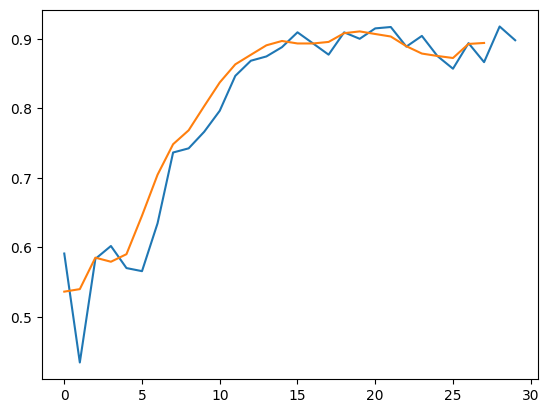

In [51]:
plt.plot(shap_sl["predicts"].tolist())
plt.plot(running_mean(shap_sl["predicts"], 3))

In [210]:
graph = {}

for f in tqdm(set(sum(selected_features, []))):
    for x in selected_features:
        if f in x:
            if f not in list(graph.keys()):
                graph[f] = {}
            for x1 in x:
                if x1 != f:
                    if x1 not in list(graph[f].keys()):
                        graph[f][x1] = 1
                    else:
                        graph[f][x1] += 1

100%|██████████████████████████████████████████| 45/45 [00:00<00:00, 391.82it/s]


In [211]:
import networkx as nx
from pyvis.network import Network

import matplotlib.pyplot as plt

In [212]:
net = Network(notebook=True)

# Добавляем узлы и ребра
for node, edges in graph.items():
    net.add_node(node)  # Добавляем узел
    for connected_node, weight in edges.items():
        net.add_node(connected_node)  # Добавляем подключенный узел
        net.add_edge(node, connected_node, value=weight)  # Добавляем взвешенное ребро


In [213]:
net.show("graph.html")

graph.html


In [29]:
tmp_diffs['Сумма налогов']

646           NaN
2249    -0.406758
3380     0.407349
3871     0.000000
5628     0.000000
6076     0.000000
7281     0.000000
8746     0.000000
9603     0.000113
9806     0.000000
10848    0.000000
11642    0.000000
12576    0.000000
13821    0.000000
13935    0.000000
14995    0.000000
16052    0.000000
Name: Сумма налогов, dtype: float64

In [53]:
d = dict(full_contract_pred[0].iloc[0])

In [63]:
list(d.keys())[2:][np.argmax(list(d.values())[2:])]

'Среднее кол-во рабочих подрядчика на строплощадке за {n} недел{m} на текущий момент контракта'

In [64]:
list(d.keys())[2:][np.argmin(list(d.values())[2:])]

'Время с последней даты заявки по контракту__linear_trend__attr_intercept'